# 05 - Deep Learning Models

This notebook covers:
- Simple RNN
- LSTM
- Bidirectional LSTM
- GRU
- Performance evaluation for each model

## Import Libraries

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')

## Load Data and Prepare Sequences

In [3]:
df = pd.read_csv("/content/sample_data/Phishing_Email_Preprocessed.csv")
df.head()

,Email Text,Email Type,Email Text processed
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,re 6 1100 disc uniformitarianism re 1086 sex l...
1,the other side of * galicismos * * galicismo *...,1,the other side of galicismos galicismo is a sp...
2,re : equistar deal tickets are you still avail...,1,re equistar deal tickets are you still availab...
3,\nHello I am your hot lil horny toy.\n I am...,0,hello i am your hot lil horny toy i am the one...
4,software at incredibly low prices ( 86 % lower...,0,software at incredibly low prices 86 lower dra...


In [4]:
max_len = 150

tk = Tokenizer()

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [5]:
len(vector)

17538

In [6]:
x = np.array(vector)
y = np.array(df["Email Type"])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

## Simple RNN

In [8]:
model_smp = Sequential()
model_smp.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_smp.add(SimpleRNN(units=100))
model_smp.add(Dropout(0.45))
model_smp .add(Dense(1, activation='sigmoid'))

In [9]:
model_smp.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [10]:
model_smp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=1, restore_best_weights=True)
historical_smp  = model_smp.fit(x_train,y_train, epochs=12, batch_size=32, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/12
439/439 ━━━━━━━━━━━━━━━━━━━━ 73s 158ms/step - accuracy: 0.5893 - loss: 0.6650 - val_accuracy: 0.6613 - val_loss: 0.5480
Epoch 2/12
439/439 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.7228 - loss: 0.4858 - val_accuracy: 0.7135 - val_loss: 0.5270
Epoch 3/12
439/439 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.7750 - loss: 0.3998 - val_accuracy: 0.7822 - val_loss: 0.5010
Epoch 4/12
439/439 ━━━━━━━━━━━━━━━━━━━━ 69s 158ms/step - accuracy: 0.7973 - loss: 0.4000 - val_accuracy: 0.7717 - val_loss: 0.4583


Text(0, 0.5, 'Loss')

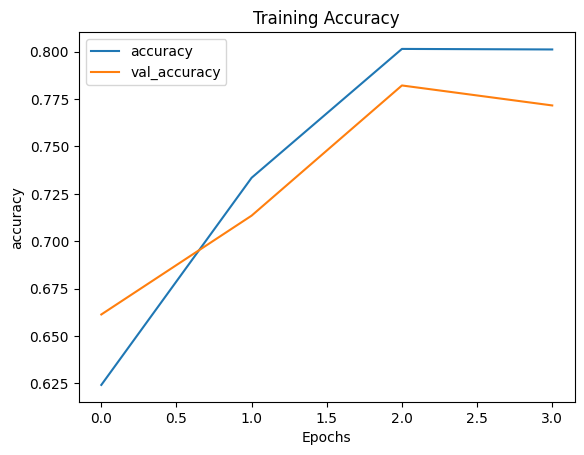

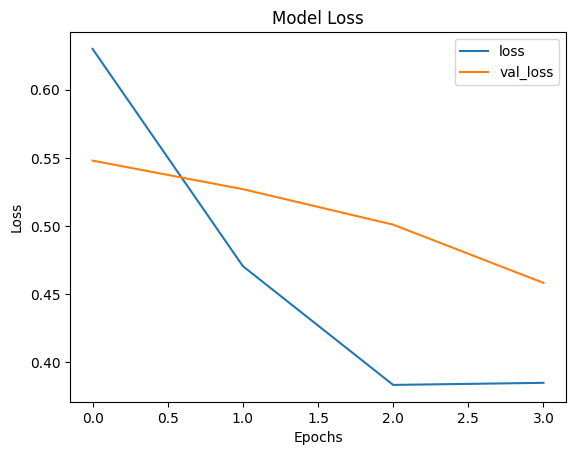

In [12]:
import matplotlib.pyplot as plt
pd.DataFrame(historical_smp.history)

pd.DataFrame(historical_smp.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical_smp.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


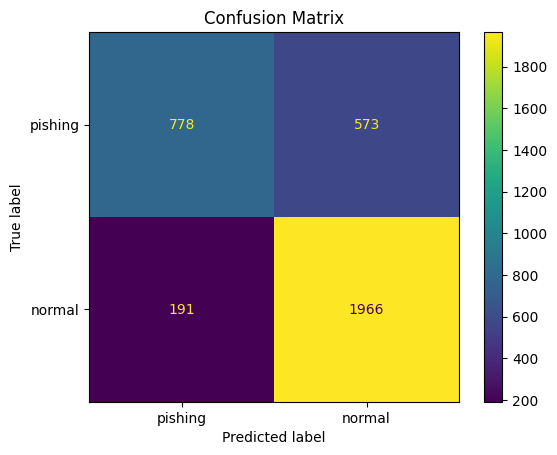

In [13]:
y_pred_prob_smp = model_smp.predict(x_test)
y_pred_smp = (y_pred_prob_smp > 0.5).astype(int)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_smp = confusion_matrix(y_test,y_pred_smp)
ax_smp = ConfusionMatrixDisplay(confusion_matrix=cnf_smp,display_labels=['pishing','normal']).plot()
plt.title("Confusion Matrix")
plt.show()

## LSTM Architecture

In [14]:
model = Sequential()
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.45))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=1, restore_best_weights=True)
historical  = model.fit(x_train,y_train, epochs=5, batch_size=16, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 155s 173ms/step - accuracy: 0.7054 - loss: 0.5868 - val_accuracy: 0.9319 - val_loss: 0.2209
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 148s 169ms/step - accuracy: 0.9131 - loss: 0.2596 - val_accuracy: 0.8925 - val_loss: 0.2853


## Performance

In [18]:
results = model.evaluate(x_test, y_test)
loss = results[0]
accuracy = results[1]

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy*100}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9373 - loss: 0.2062
Model Loss: 0.22091777622699738
Model Accuracy: 93.18699836730957


In [19]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step


Text(0, 0.5, 'Loss')

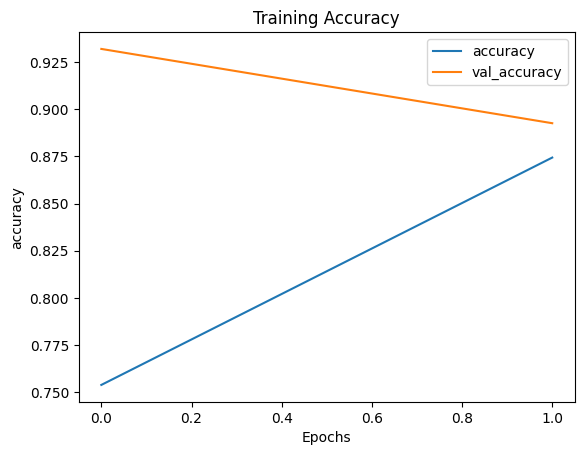

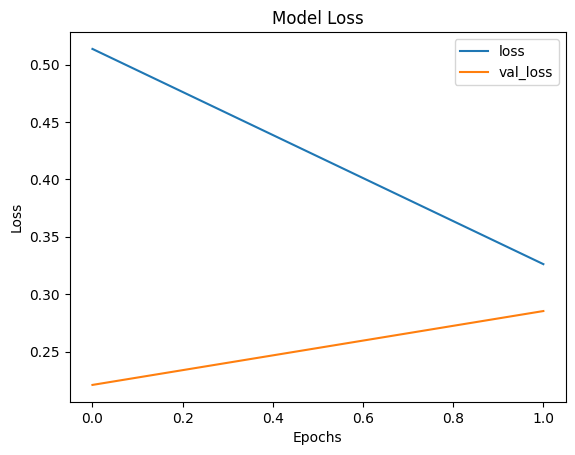

In [20]:
pd.DataFrame(historical.history)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

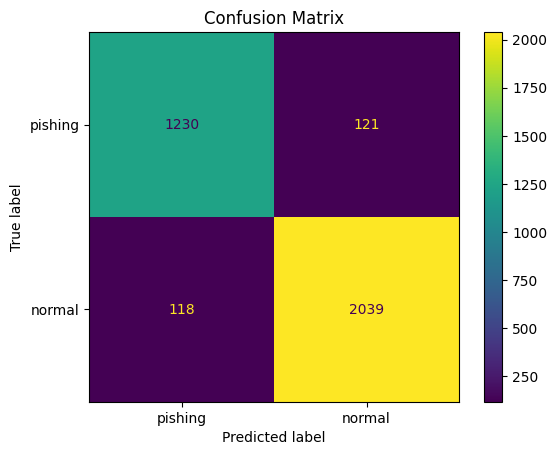

In [21]:
cnf = confusion_matrix(y_test,y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=['pishing','normal'])
ax.plot()
plt.title("Confusion Matrix")
plt.show()

## Bidirectional LSTM

In [22]:
model_bi = Sequential()
model_bi.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_bi.add(Bidirectional(LSTM(units=100)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(1, activation='sigmoid'))

In [23]:
model_bi.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [24]:
model_bi.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=1, restore_best_weights=True)
historical  = model_bi.fit(x_train,y_train, epochs=2, batch_size=16, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/2
877/877 ━━━━━━━━━━━━━━━━━━━━ 233s 259ms/step - accuracy: 0.8465 - loss: 0.3419 - val_accuracy: 0.9458 - val_loss: 0.1503
Epoch 2/2
877/877 ━━━━━━━━━━━━━━━━━━━━ 262s 260ms/step - accuracy: 0.9879 - loss: 0.0438 - val_accuracy: 0.9778 - val_loss: 0.0890


In [26]:
model_bi.evaluate(x_test,y_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9779 - loss: 0.0852


[0.08897081762552261, 0.9777650833129883]

Text(0, 0.5, 'Loss')

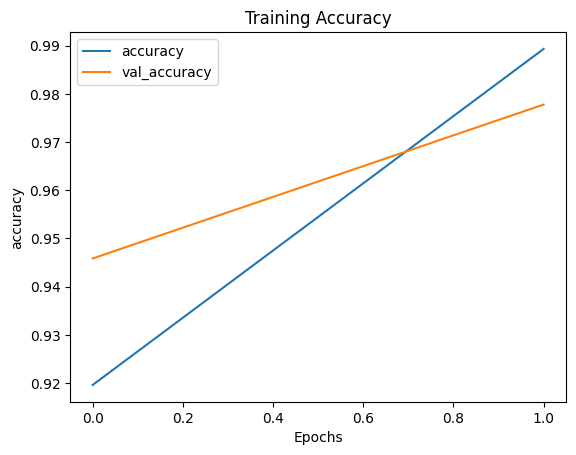

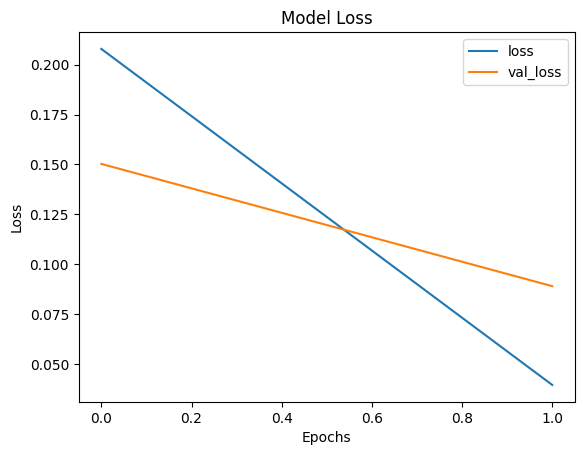

In [27]:
pd.DataFrame(historical.history)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [28]:
y_pred_prob_bi = model_bi.predict(x_test)
y_pred_bi = (y_pred_prob_bi > 0.5).astype(int)

110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step


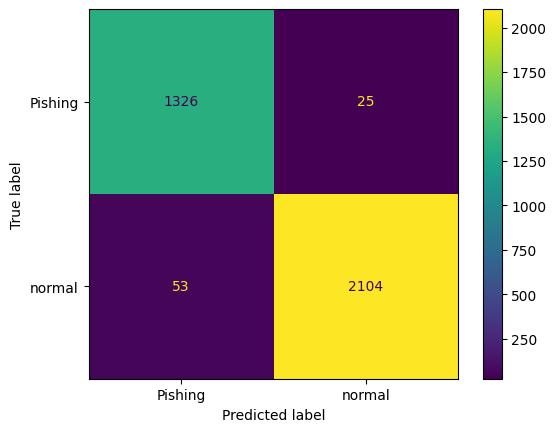

In [29]:
cnf_bi = confusion_matrix(y_test,y_pred_bi)
ax_bi = ConfusionMatrixDisplay(confusion_matrix=cnf_bi,display_labels=['Pishing','normal'])
ax_bi.plot()
plt.show()

## GRU (Gated Recurrent Unit)

In [30]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_gru.add(GRU(units=100))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1, activation='sigmoid'))

In [31]:
model_gru.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=1, restore_best_weights=True)
model_gru.fit(x_train,y_train, epochs=3, batch_size=16, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/3
877/877 ━━━━━━━━━━━━━━━━━━━━ 173s 193ms/step - accuracy: 0.6808 - loss: 0.5824 - val_accuracy: 0.9541 - val_loss: 0.1708
Epoch 2/3
877/877 ━━━━━━━━━━━━━━━━━━━━ 170s 194ms/step - accuracy: 0.8836 - loss: 0.3029 - val_accuracy: 0.9627 - val_loss: 0.1073
Epoch 3/3
877/877 ━━━━━━━━━━━━━━━━━━━━ 204s 196ms/step - accuracy: 0.9880 - loss: 0.0465 - val_accuracy: 0.9775 - val_loss: 0.0693


Text(0, 0.5, 'Loss')

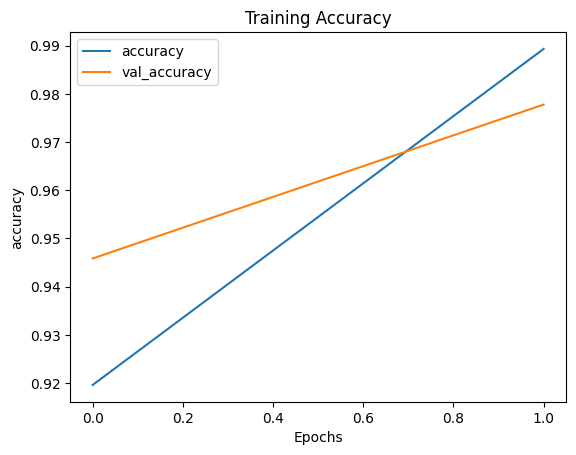

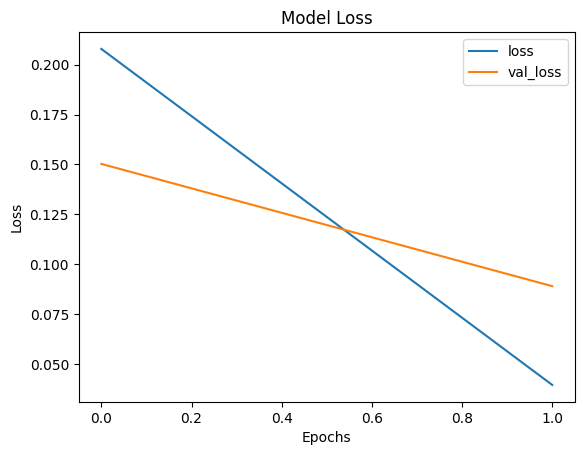

In [33]:
pd.DataFrame(historical.history)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [34]:
y_pred_prob_gru = model_gru.predict(x_test)
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)

110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


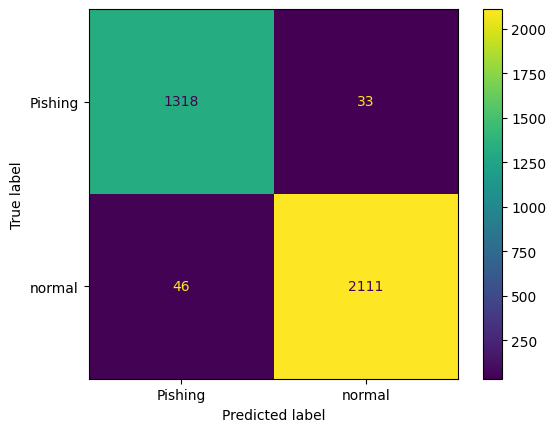

In [35]:
cnf_gru = confusion_matrix(y_test,y_pred_gru)
ax_gru = ConfusionMatrixDisplay(confusion_matrix=cnf_gru,display_labels=['Pishing','normal'])
ax_gru.plot()
plt.show()